In [67]:
# Initialize Otter
import otter
grader = otter.Notebook("hw08.ipynb")

<img src="./ccsf.png" alt="CCSF Logo" width=200px style="margin:0px -5px">

# Homework 8: A/B Testing

## References

* [Comparing Two Samples](https://inferentialthinking.com/chapters/12/Comparing_Two_Samples.html)
* [`datascience` Documentation](https://datascience.readthedocs.io/)
* [Python Quick Reference](https://ccsf-math-108.github.io/materials-fa23/resources/quick_reference.html)

---

## Assignment Reminders

- 🚨 Make sure to run the code cell at the top of this notebook that starts with `# Initialize Otter` to load the auto-grader.
- Your Tasks are categorized as auto-graded (📍) and manually graded (📍🔎).
    - For all the auto-graded tasks:
        - Replace the `...` in the provided code cell with your own code.
        - Run the `grader.check` code cell to run some tests on your code.
        - Keep in mind that for homework and project assignments, sometimes there are hidden tests that you will not be able to see the results of that we use for scoring the correctness of your response. **Passing the auto-grader does not guarantee that your answer is correct.**
    - For all the manually graded tasks:
        - You might need to provide your own response to the provided prompt. Do so by replacing the template text "_Type your answer here, replacing this text._" with your own words.
        - You might need to produce a graphic or something else using code. Do so by replacing the `...` in the code cell to generate the image, table, etc.
        - In either case, review the rubric on the associated <a href="https://ccsf.instructure.com" target="_blank">Canvas</a> Assignment page to understand the scoring criteria.
- Throughout this assignment and all future ones, please be sure to not re-assign variables throughout the notebook! _For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!_
- You may [submit](#Submit-Your-Assignment-to-Canvas) this assignment as many times as you want before the deadline. Your instructor will score the last version you submit once the deadline has passed.
- We encourage you to discuss this assignment with others but make sure to write and submit your own code. Refer to the syllabus to learn more about how to learn cooperatively.

---

## Configure the Notebook

Run the following cell to configure this Notebook.

In [68]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

---

## Who is Older?

---

In an attempt to answer the question 'Who is Older?', data scientists have drawn a simple random sample of size 500 from a large population of adults. Each member of the population happened to identify as either "male" or "female". Data was collected on several attributes of the sampled people, including age. The table `sampled_ages` contains one row for each person in the sample, with columns containing the individual's gender identity and their age.

In [69]:
sampled_ages = Table.read_table('age.csv')
sampled_ages.show(5)

Gender,Age
male,23
male,29
male,29
female,49
female,33


---

### Task 01 📍

How many females are there in this sample? Please use the provided skeleton code.

*Hint:* Keep in mind that `.group` sorts categories in alphabetical order!

_Points:_ 3

In [70]:
num_females = sampled_ages.group("Gender").column("count")[0]
num_females

260

In [71]:
grader.check("task_01")

task_01 results: All test cases passed!
task_01 - 1 message: ✅ num_females is a value betwen 0 and 500.

---

### Task 02 📍

Complete the cell below so that `avg_male_vs_female` evaluates to `True` if the sampled males are older than the sampled females on average, and `False` otherwise. Use Python code to achieve this.

_Points:_ 3

In [72]:
group_mean_tbl = sampled_ages.group("Gender", np.mean)
group_means = group_mean_tbl.column("Age mean")  # array of mean ages
avg_male_vs_female = group_means[1] > group_means[0]  # male (1) vs female (0) due to alphabetical order
avg_male_vs_female


True

In [73]:
grader.check("task_02")

task_02 results: All test cases passed!
task_02 - 1 message: ✅ avg_male_vs_female is a bool.

---

### Task 03 📍

The data scientists want to use the data to test whether males are older than females on average or whether the ages of the two groups have the same distribution. 

In the code cell below, assign `null_statement_number` and `alternative_statement_number` to the number corresponding to the correct statement from the list below. (There is only one correct answer for each.)

1. In the sample, the males and females have the same distribution of ages; the sample averages of the two groups are different due to chance.
2. In the population, the males and females have the same distribution of ages; the sample averages of the two groups are different due to chance.
3. The age distributions of males and females in the population are different due to chance.
4. The males in the sample are older than the females, on average.
5. The males in the population are older than the females, on average.
6. The average ages of the males and females in the population are different.

_Points:_ 3

In [74]:
null_statement_number = 2
alternative_statement_number = 6

In [75]:
grader.check("task_03")

task_03 results: All test cases passed!
task_03 - 1 message: ✅ null_statement_number is an int.
task_03 - 2 message: ✅ alternative_statement_number is an int.
task_03 - 3 message: ✅ null_statement_number is a number between 1 and 6.
task_03 - 4 message: ✅ alternative_statement_number is a number between 1 and 6.
task_03 - 5 message: ✅ null_statement_number is not the same as alternative_statement_number.

---

### Task 04 📍🔎

<!-- BEGIN QUESTION -->

Why is a permutation test appropriate to use in this situation? In your response, relate this situation to the examples from a class lecture, discussion topic, or the [Chapter 12](https://inferentialthinking.com/chapters/12/1/AB_Testing.html) content.

_Points:_ 2

This scenario is well-suited for a permutation test, which helps us determine if the observed average age difference between males and females could be random. By applying this test, we simulate the expected distribution of average ages as if no true population difference exists, attributing any variations to the effects of sampling.

<!-- END QUESTION -->

---

### Task 05 📍

To test their hypotheses, the data scientists have followed our textbook's advice and chosen a test statistic where the following statement is true: Large values of the test statistic favor the alternative hypothesis.

The data scientists' test statistic is one of the two options below. Which one is it? Assign the appropriate number to the variable `correct_test_stat`.

1. "male age average - female age average" in a sample created by randomly shuffling the male/female labels
2. "|male age average - female age average|" in a sample created by randomly shuffling the male/female labels

_Points:_ 3

In [76]:
correct_test_stat = 1
correct_test_stat

1

In [77]:
grader.check("task_05")

task_05 results: All test cases passed!
task_05 - 1 message: ✅ correct_test_stat is an int.
task_05 - 2 message: ✅ correct_test_stat is either 1 or 2.

---

### Task 06 📍

Complete the cell below so that `observed_statistic_ab` evaluates to the observed value of the data scientists' test statistic. Use as many lines of code as you need, and remember that you can use any quantity, table, or array that you created earlier.

_Points:_ 3

In [78]:
group_mean_tbl = sampled_ages.group("Gender", np.mean)
group_means = group_mean_tbl.column("Age mean")

female_mean = group_means.item(0)
male_mean = group_means.item(1)

observed_statistic_ab = (male_mean - female_mean)
observed_statistic_ab

1.314102564102562

In [79]:
grader.check("task_06")

task_06 results: All test cases passed!
task_06 - 1 message: ✅ observed_statistic_ab is a float.
task_06 - 2 message: ✅ observed_statistic_ab is 0 or larger.

---

### Task 07 📍

Assign `shuffled_labels` to an array of shuffled male/female labels. The rest of the code puts the array in a table along with the data in `sampled_ages`.

*Note:* Check out [12.1](https://inferentialthinking.com/chapters/12/1/AB_Testing.html#predicting-the-statistic-under-the-null-hypothesis) for a refresher on random permutations.

_Points:_ 3

In [80]:
shuffled_labels = np.random.permutation(sampled_ages.column("Gender"))
original_with_shuffled_labels = sampled_ages.with_columns('Shuffled Label', shuffled_labels)
original_with_shuffled_labels

Gender,Age,Shuffled Label
male,23,female
male,29,female
male,29,female
female,49,male
female,33,female
male,31,female
male,60,female
male,38,male
female,60,male
female,27,female


In [81]:
grader.check("task_07")

task_07 results: All test cases passed!
task_07 - 1 message: ✅ original_with_shuffled_labels is a Table.
task_07 - 2 message: ✅ The labels for original_with_shuffled_labels are correct.
task_07 - 3 message: ✅ original_with_shuffled_labels has the correct number of rows.

---

### Task 08 📍

The comparison below uses the array `shuffled_labels` from Task 07 and the count `num_females` from Task 01.

For this comparison, assign the correct number from one of the following options to the variable `correct_q8`. **Pretend this is a midterm problem and solve it without doing the calculation in a code cell.**

`comp = np.count_nonzero(shuffled_labels == 'female') == num_females`

1. `comp` is set to `True`.
2. `comp` is set to `False`.
3. `comp` is set to `True` or `False`, depending on how the shuffle came out.

_Points:_ 3

In [82]:
correct_q8 = 3
correct_q8

3

In [83]:
grader.check("task_08")

task_08 results: All test cases passed!
task_08 - 1 message: ✅ correct_q8 is an int.
task_08 - 2 message: ✅ correct_q8 is a number between 1 and 3.

---

### Task 09 📍

Define a function `simulate_one_statistic` that takes no arguments and returns one simulated value of the test statistic. We've given you a skeleton, but feel free to approach this question in a way that makes sense to you. Use as many lines of code as you need. Refer to the code you have previously written in this problem, as you might be able to re-use some of it.

In [84]:
def simulate_one_statistic():
    "Returns one value of our simulated test statistic"
    shuffled_labels = np.random.permutation(sampled_ages.column("Gender"))
    shuffled_tbl = sampled_ages.with_column("Shuffled Label", shuffled_labels)
    group_means = shuffled_tbl.group("Shuffled Label", np.mean).column("Age mean")
    test_statistic = group_means.item(1) - group_means.item(0)
    return test_statistic

After you have defined your function, run the following cell a few times to see how the statistic varies.

_Points:_ 3

In [85]:
simulate_one_statistic()

-0.1282051282051313

In [86]:
grader.check("task_09")

task_09 results: All test cases passed!
task_09 - 1 message: ✅ simulate_one_statistic() returns values between -5 and 5.
task_09 - 2 message: ✅ simulate_one_statistic seems to be working correctly

---

### Task 10 📍

Complete the cell to simulate 4,000 values of the statistic. We have included the code that draws the empirical distribution of the statistic and shows the value of `observed_statistic_ab` from Task 06. Feel free to use as many lines of code as you need.

*Note:* This cell will take around one minute to run.

_Points:_ 3

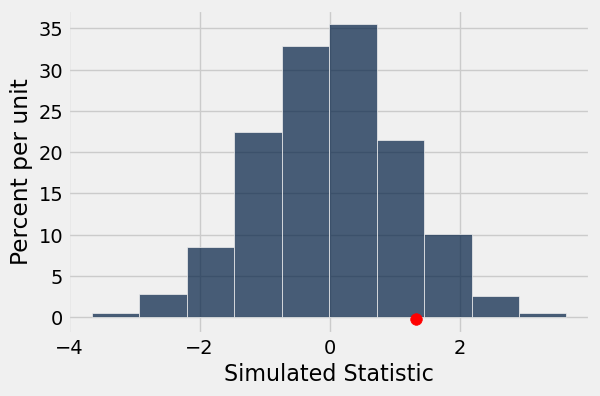

In [87]:
repetitions = 4000

simulated_statistics_ab = make_array()
for _ in range(repetitions):
    simulated_statistic = simulate_one_statistic()
    simulated_statistics_ab = np.append(simulated_statistics_ab, simulated_statistic)

# Do not change these lines
Table().with_columns('Simulated Statistic', simulated_statistics_ab).hist()
plt.scatter(observed_statistic_ab, -0.002, color='red', s=70);

In [88]:
grader.check("task_10")

task_10 results: All test cases passed!
task_10 - 1 message: ✅ simulated_statistics_ab has 4,000 elements.

---

### Task 11 📍

Use the simulation to find an empirical approximation to the p-value. Assign `p_val` to the appropriate p-value from this simulation.

_Points:_ 2

In [90]:
p_val = np.count_nonzero(simulated_statistics_ab >= observed_statistic_ab) / repetitions
p_val

0.118

In [91]:
grader.check("task_11")

task_11 results: All test cases passed!
task_11 - 1 message: ✅ p_val is a float.
task_11 - 2 message: ✅ p_val is a number between 0 and 1.

---

### Task 12 📍🔎

<!-- BEGIN QUESTION -->

What conclusion can we draw from this permutation test? In your response, compare the p-value to an assumed significance level of 5% and indicate whether the data and test results support the null or" alternative hypothesis.

_Points:_ 2

The p-value, calculated at 0.118, is greater than the 5% significance level, suggesting the observed age difference might be random. This leads us to retain the null hypothesis, indicating insufficient evidence to support the alternative and that the population age distributions for males and females could be the same.

<!-- END QUESTION -->

---

## Submit Your Assignment to Canvas

Follow these steps to submit your homework assignment:

1. **Review the Rubric:** View the rubric on the associated Canvas Assignment page to understand the scoring criteria.
2. **Run the Auto-Grader:** Ensure you have executed the code cell containing the command `grader.check_all()` to run all tests for auto-graded tasks marked with 📍. This command will execute all auto-grader tests sequentially.
3. **Complete Manually Graded Tasks:** Verify that you have responded to all the manually graded tasks marked with 📍🔎.
4. **Save Your Work:** In the notebook's Toolbar, go to `File -> Save Notebook` to save your work and create a checkpoint.
5. **Download the Notebook:** In the notebook's Toolbar, go to `File -> Download IPYNB` to download the notebook (`.ipynb`) file.
6. **Upload to Canvas:** On the Canvas Assignment page, click "Start Assignment" or "New Attempt" to upload the downloaded `.ipynb` file.

---

## Attribution

This content is licensed under the <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License (CC BY-NC-SA 4.0)</a> and derived from the <a href="https://www.data8.org/">Data 8: The Foundations of Data Science</a> offered by the University of California, Berkeley.

<img src="./by-nc-sa.png" width=100px>

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [92]:
grader.check_all()

task_01 results: All test cases passed!
task_01 - 1 message: ✅ num_females is a value betwen 0 and 500.

task_02 results: All test cases passed!
task_02 - 1 message: ✅ avg_male_vs_female is a bool.

task_03 results: All test cases passed!
task_03 - 1 message: ✅ null_statement_number is an int.
task_03 - 2 message: ✅ alternative_statement_number is an int.
task_03 - 3 message: ✅ null_statement_number is a number between 1 and 6.
task_03 - 4 message: ✅ alternative_statement_number is a number between 1 and 6.
task_03 - 5 message: ✅ null_statement_number is not the same as alternative_statement_number.

task_05 results: All test cases passed!
task_05 - 1 message: ✅ correct_test_stat is an int.
task_05 - 2 message: ✅ correct_test_stat is either 1 or 2.

task_06 results: All test cases passed!
task_06 - 1 message: ✅ observed_statistic_ab is a float.
task_06 - 2 message: ✅ observed_statistic_ab is 0 or larger.

task_07 results: All test cases passed!
task_07 - 1 message: ✅ original_with_shuf